<a href="https://colab.research.google.com/github/saubhagyav/Hotel_Bookings_analysis/blob/main/Saubhagya_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:
import numpy as np
import pandas as pd
import ast
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Alma Better/Python for data science/capstone - Hotel Booking Analysis/Copy of Hotel Bookings.csv'

In [5]:
df = pd.read_csv(path)

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.shape

(119390, 32)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
# Dropping some columns that we won't be using for our analysis

df_a = df.drop(columns= ['agent', 'company', 'adults'])

In [10]:
# Let's just look at how many bookings were made in City Hotel and Resort Hotel

df.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [12]:
# Now we have got the bookings that were not cancelled 

df.hotel[df['is_canceled']== 0].value_counts()

City Hotel      46228
Resort Hotel    28938
Name: hotel, dtype: int64

In [13]:
# Now we have got the bookings that were cancelled 

df.hotel[df['is_canceled']!= 0].value_counts()

City Hotel      33102
Resort Hotel    11122
Name: hotel, dtype: int64

In [14]:
# Taking out all the variables from the dataframe to check for correlation


df_cor = pd.DataFrame(df.loc[:, ['is_canceled', 'lead_time','is_repeated_guest', 'previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'total_of_special_requests', 'adr','stays_in_weekend_nights', 'required_car_parking_spaces' ]])

In [15]:
corrMatrix = df_cor.corr()

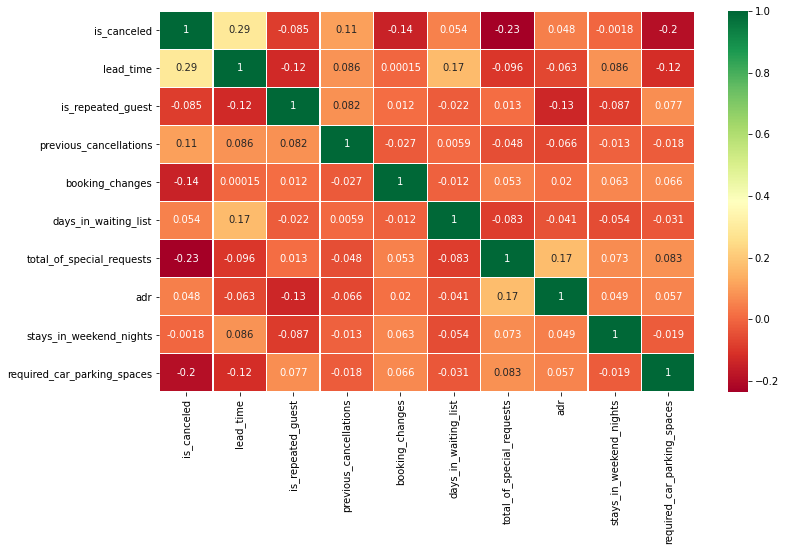

In [22]:
# so we can clearly observe that there is not any significant correlation between the variables.
fig, ax = plt.subplots(figsize = (12, 7))


sn.heatmap(corrMatrix, cmap ='RdYlGn', linewidths = 0.30, annot=True )
plt.show()

In [25]:
# mean adr of all the distribution channels

df_a.groupby('distribution_channel').agg({'adr': 'mean'}).sort_values(by='adr',ascending=False)

,adr
distribution_channel,
GDS,120.554301
Direct,106.654983
TA/TO,103.292866
Corporate,69.325204
Undefined,46.240000


In [26]:
# sum of adr of all the bookings made using different distribution channels including cancellation bookings

df_a.groupby('distribution_channel').agg({'adr': 'sum'}).sort_values(by='adr',ascending=False)

,adr
distribution_channel,
TA/TO,10109272.81
Direct,1561962.22
Corporate,462884.39
GDS,23266.98
Undefined,231.20


In [27]:
# sum of adr of all the bookings made using different distribution channels excluding cancellation bookings

df_a[df_a['is_canceled'] != 1].groupby('distribution_channel').agg({'adr': 'sum'}).sort_values(by='adr',ascending=False)

,adr
distribution_channel,
TA/TO,5865166.66
Direct,1281794.70
Corporate,349891.25
GDS,18709.62
Undefined,112.70


In [33]:
# Grouping Country and hotel on bookings excluding cancelled bookings to calculate the booking count as per country

df_count = df_a[df_a['is_canceled'] != 1].groupby(['country','hotel']).agg({'hotel': 'count'})
df_count

hotel
country hotel              
ABW     City Hotel        2
AGO     City Hotel      140
        Resort Hotel     17
AIA     City Hotel        1
ALB     City Hotel        8
...                     ...
VNM     Resort Hotel      2
ZAF     City Hotel       36
        Resort Hotel     13
ZMB     Resort Hotel      1
ZWE     Resort Hotel      2

[268 rows x 1 columns]

In [30]:
# using rename and sort to come up with a final Dataframe containing top countries from where bookings come from.


df_count.rename(columns={'hotel': 'no_of_bookings'},inplace=True)
df_count.sort_values(by='no_of_bookings', ascending=False).head(20)

no_of_bookings
country hotel                       
PRT     City Hotel             10879
        Resort Hotel           10192
FRA     City Hotel              7081
GBR     Resort Hotel            5923
DEU     City Hotel              5012
GBR     City Hotel              3753
ESP     City Hotel              3285
        Resort Hotel            3106
ITA     City Hotel              2054
IRL     Resort Hotel            1734
BEL     City Hotel              1479
FRA     Resort Hotel            1400
NLD     City Hotel              1259
USA     City Hotel              1189
BRA     City Hotel              1065
DEU     Resort Hotel            1057
CHE     City Hotel               979
AUT     City Hotel               857
IRL     City Hotel               809
CN      Resort Hotel             614

In [37]:
# Finding the stats of lead time when bookings are not cancelled

df_b1 = pd.DataFrame(df_a[df_a['is_canceled'] !=1 ][['lead_time','is_canceled']])
df_b1.groupby('is_canceled')['lead_time'].describe()

,count,mean,std,min,25%,50%,75%,max
is_canceled,,,,,,,,
0,75166.0,79.984687,91.109888,0.0,9.0,45.0,124.0,737.0


In [38]:
# Finding the stats of lead time when bookings are cancelled

df_b2 = pd.DataFrame(df_a[df_a['is_canceled'] ==1 ][['lead_time','is_canceled']])
df_b2.groupby('is_canceled')['lead_time'].describe()

,count,mean,std,min,25%,50%,75%,max
is_canceled,,,,,,,,
1,44224.0,144.848815,118.624829,0.0,48.0,113.0,214.0,629.0


In [39]:
df_c = df_a[['hotel','arrival_date_month']]
df_c

,hotel,arrival_date_month
0,Resort Hotel,July
1,Resort Hotel,July
2,Resort Hotel,July
3,Resort Hotel,July
4,Resort Hotel,July
...,...,...
119385,City Hotel,August
119386,City Hotel,August
119387,City Hotel,August
119388,City Hotel,August


In [41]:
# Calculating the total number of bookings made in the two hotels based on months

df_d = pd.DataFrame(df_c.groupby('arrival_date_month')['hotel'].value_counts())
df_d.rename(columns={'hotel':'no_of_bookings'}, inplace=True)
df_d

no_of_bookings
arrival_date_month hotel                       
April              City Hotel              7480
                   Resort Hotel            3609
August             City Hotel              8983
                   Resort Hotel            4894
December           City Hotel              4132
                   Resort Hotel            2648
February           City Hotel              4965
                   Resort Hotel            3103
January            City Hotel              3736
                   Resort Hotel            2193
July               City Hotel              8088
                   Resort Hotel            4573
June               City Hotel              7894
                   Resort Hotel            3045
March              City Hotel              6458
                   Resort Hotel            3336
May                City Hotel              8232
                   Resort Hotel            3559
November           City Hotel              4357
                   Resort Hotel            2437
October            City Hotel              7605
                   Resort Hotel            3555
September          City Hotel              7400
                   Resort Hotel            3108

In [42]:
# peak months are may, june, july and august

df_d.sort_values(by='no_of_bookings', ascending=False)

,,no_of_bookings
arrival_date_month,hotel,
August,City Hotel,8983
May,City Hotel,8232
July,City Hotel,8088
June,City Hotel,7894
October,City Hotel,7605
April,City Hotel,7480
September,City Hotel,7400
March,City Hotel,6458
February,City Hotel,4965
